# Importing libraries


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

# Importing dataset


In [2]:
df=pd.read_csv('all_data_copy.csv')  ##loading dataset
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


SUMMARY OF RAW DATA:- The above dataset looks like some super-market's products' analysis for review. We can observe different columns in the table like ORDER-ID shows id for different customers who bought different commodities. PRODUCT column shows the commodities sold, QTY ORDERED shows no. of units sold, PRICE EACH column shows cost/unit of each product, ORDER DATE shows date along with time of prodcut sold,PURCHASE ADDRESS shows address of customers. 

In [3]:
##checking datatype sof all columns
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [4]:
##checking non-null values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


So, as we can see, 372610 is the number of non-null values.

In [5]:
##checking number of null values
df.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

We can see that there are 1090 null-values in dataset, which is very less as compared to dataset value count.

In [6]:
##finding what % of null-values comprises the dataset
(df.isnull().sum().sum())/len(df)*100

1.75006689858175

As % of null-values is very less, dropping them won't be affecting our data for further analysis.

In [7]:
##dropping the null-values
df=df.dropna()

In [8]:
##verifying if null-values are dropped
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

We have dropped the null-values and now there are no null-values in dataset.

In [9]:
##observed few rows with same value as that of title, hence, dropping them
df[df['Quantity Ordered']=="Quantity Ordered"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
372014,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
372401,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373413,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373482,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
##dropping rows with same values as that of column-title
df_new=df[df['Quantity Ordered']!="Quantity Ordered"]
df_new.shape

(371900, 6)

Dropped the rows having cells with values similar to that of column-title with a view that it won't affect our further data-analysis.
We can see that now number of rows are reduced from 372610 to 371900.
We have created a new dataset namely:- "df_new".

In [11]:
##checking duplicate values in newly created dataset
df_new.duplicated().value_counts()  

True     186214
False    185686
dtype: int64

We can see that there are 186214 duplictaes in dataset, now we'll drop the duplicates as well.

In [12]:
##dropping duplicates
df_new.drop_duplicates(inplace=True)

<ipython-input-12-3d6a0ddc675e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop_duplicates(inplace=True)


In [13]:
##verifying if duplicates are dropped
df_new.duplicated().value_counts()

False    185686
dtype: int64

We can see that duplicates are dropped and we have got count of 185686.

In [14]:
##getting shape of new dataset
df_new.shape

(185686, 6)

We have got the number of rows reduced to 185686 from 373700 after removing null-values, duplicates, junk.
Now, this is the data we have to work upon.

# New dataset 


In [15]:
##seeing new dataset
df_new

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity Ordered  185686 non-null  object
 3   Price Each        185686 non-null  object
 4   Order Date        185686 non-null  object
 5   Purchase Address  185686 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [17]:
df_new["Order Date"]=pd.to_datetime(df_new["Order Date"])
df_new["Quantity Ordered"]=pd.to_numeric(df_new["Quantity Ordered"])
df_new["Order ID"]=pd.to_numeric(df_new["Order ID"])

<ipython-input-17-41aceeb4f325>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Order Date"]=pd.to_datetime(df_new["Order Date"])
<ipython-input-17-41aceeb4f325>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Quantity Ordered"]=pd.to_numeric(df_new["Quantity Ordered"])
<ipython-input-17-41aceeb4f325>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [18]:
##verified the changed datatypes for different columns
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  object        
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 9.9+ MB


In [19]:
df_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [20]:
df_new.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"
186849,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001"


In [22]:
##creating new column CITY showing cities
df_city=df_new
list_city=[]
for i in df_city['Purchase Address']:
    list_city.append(i.split(",")[1])
df_city['City']=list_city

<ipython-input-22-5fc3b03f3e02>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['City']=list_city


In [23]:
##creating new column STATE showing states
df_state=df_new
list_state=[]
for a in df_state['Purchase Address']:
    list_state.append(a.split(",")[2])
df_state['State']=list_state

<ipython-input-23-9bea1b87c1af>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['State']=list_state


In [24]:
##verifying if STATE column got created
df_new

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,TX 73301
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",San Francisco,CA 94016
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",Los Angeles,CA 90001
186847,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",Seattle,WA 98101
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",Dallas,TX 75001


Above, we have added 02 columns CITY & STATE, taking number of columns in dataset to 8.

In [30]:
##adding column "SALES" as product of qty-ordered and price each by converting qty & price column to FLOAT
df_new["Quantity Ordered"]=df_new["Quantity Ordered"].astype("float")
df_new["Price Each"]=df_new["Price Each"].astype("float")
df_new["Sales"]=df_new["Quantity Ordered"]*df_new["Price Each"]

<ipython-input-30-26925598ad3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Quantity Ordered"]=df_new["Quantity Ordered"].astype("float")
<ipython-input-30-26925598ad3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Price Each"]=df_new["Price Each"].astype("float")
<ipython-input-30-26925598ad3a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [31]:
##verifying if SLALES column got created
df_new

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State,Month,Sales
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,MA 02215,1,700.00
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,OR 97035,1,14.95
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,CA 94016,1,23.98
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,CA 90001,1,149.99
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,TX 73301,1,11.99
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",San Francisco,CA 94016,12,14.95
186846,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",Los Angeles,CA 90001,12,7.68
186847,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",Seattle,WA 98101,12,400.00
186848,319669,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",Dallas,TX 75001,12,11.99


Above, we have verified that SALES column is added as per our creation for further analysis. 

In [32]:
##created MONTH column for further analysis by extracting MONTH from ORDER DATE column
df_new['Month']=df_new['Order Date'].dt.month

<ipython-input-32-04d6aa86524d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Month']=df_new['Order Date'].dt.month


In [27]:
##verifying if MONTH column is created
df_new

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State,Month
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,MA 02215,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,OR 97035,1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,CA 94016,1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,CA 90001,1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,TX 73301,1
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",San Francisco,CA 94016,12
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",Los Angeles,CA 90001,12
186847,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",Seattle,WA 98101,12
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",Dallas,TX 75001,12


In [33]:
##Retrieving unique city names for plotting graph
unique_city=(df_new['City']).unique()
print(unique_city)
print(df_new['City'].nunique())

[' Boston' ' Portland' ' San Francisco' ' Los Angeles' ' Austin'
 ' Atlanta' ' Seattle' ' New York City' ' Dallas']
9


# Q-4:- Distribution of sales among different cities in different months



In [34]:
City=["Boston"," Portland","San Francisco","Los Angeles","Austin","Atlanta","Seattle","New York City","Dallas"]
import seaborn as sns
plt.figure(figsize=(20,8),dpi=700)
sns.barplot(x='City',y="Sales",hue="Month",data=df_new)
plt.title('Sales distribution')
plt.show()

In [35]:
##Q-4(a):- Which city had highest sales overall
df_city=df_new.groupby(["City"])['Sales'].sum().sort_values(ascending=False)
df_city=df_city.to_frame()
df_city

,Sales
City,
San Francisco,8.254744e+06
Los Angeles,5.448304e+06
New York City,4.661867e+06
Boston,3.658628e+06
Atlanta,2.794199e+06
Dallas,2.765374e+06
Seattle,2.745046e+06
Portland,2.319332e+06
Austin,1.818044e+06


From above graph, SAN FRANCISCO seems making highest sales.

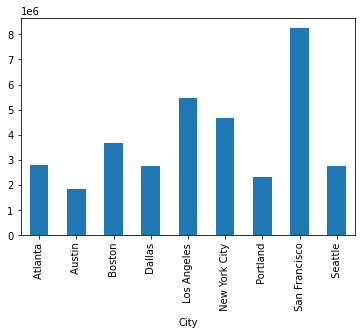

In [36]:
##Plotting above output on graph
df_new.groupby('City').Sales.sum().plot.bar()
plt.show()

In [37]:
##Q-4(b):- Which month had highest amount of sales overall 
df_new.groupby('Month')['Sales'].sum().sort_values(ascending=False)

Month
12    4.608296e+06
10    3.734778e+06
4     3.389218e+06
11    3.197875e+06
5     3.150616e+06
3     2.804973e+06
7     2.646461e+06
6     2.576280e+06
8     2.241083e+06
2     2.200078e+06
9     2.094466e+06
1     1.821413e+06
Name: Sales, dtype: float64

From above, we can observe that. DECEMBER month had highest amount of sales overall. 
Now plotting on above information on graph below:- 

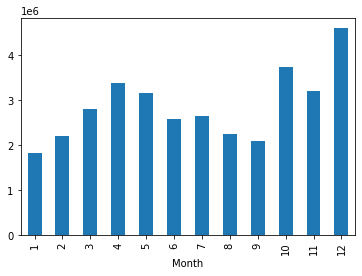

In [38]:
##Plotting above output on graph
df_new.groupby('Month').Sales.sum().plot.bar()
plt.show()

In [39]:
##getting unique product names with count
unique_product=(df_new['Product']).unique()
print(unique_product)
print(df_new['Product'].nunique())

['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine']
19


In [40]:
##Q-4(c):- Most bought products per city
df_pro=df_new.groupby(['City','Product','Sales'])['Quantity Ordered'].sum().sort_values(ascending=False)
df_pro=df_pro.to_frame()
df_pro

Quantity Ordered
City           Product                  Sales                    
 San Francisco USB-C Charging Cable     11.95              4872.0
               Lightning Charging Cable 14.95              4807.0
               Wired Headphones         11.99              4241.0
               AA Batteries (4-pack)    3.84               3675.0
               Apple Airpods Headphones 150.00             3673.0
...                                                           ...
               Vareebadd Phone          800.00                2.0
               iPhone                   1400.00               2.0
 Dallas        34in Ultrawide Monitor   759.98                2.0
 Seattle       34in Ultrawide Monitor   759.98                2.0
               iPhone                   1400.00               2.0

[425 rows x 1 columns]

From above table, we can see that USB-C CHARGING CABLE is most bought product across cities. 

From above outputs, we can say that SAN FRANCISCO should be chosen for expanding the business because high sales is observed in this city. 

# Q-5:- Distribution of sales over different times of day


Getting HOUR column from ORDER DATE below in our dataset

In [46]:
def f(x):
    if(x>4) and (x<=8):
        return 'Early Morning'
    elif(x>8) and (x<=12):
        return 'Morning'
    elif(x>12) and (x<=16):
        return 'Afternoon'
    elif(x>16) and (x<=20):
        return 'Evening'
    elif(x>20) and (x<=24):
        return 'Night'
    elif(x<=4):
        return 'Late Night'
df_new['session']=df_new['Hrs'].apply(f)
df_new

KeyError: 'Hrs'

In [203]:
##Q-5(a):- What products are sold over different times of day
df_t=df_new.groupby(['session','Product'],as_index=False)['Quantity Ordered'].count().sort_values(by='Quantity Ordered')
df_t

,session,Product,Quantity Ordered
68,Late Night,LG Washing Machine,27
67,Late Night,LG Dryer,30
30,Early Morning,LG Washing Machine,41
29,Early Morning,LG Dryer,50
105,Night,LG Dryer,86
...,...,...,...
91,Morning,USB-C Charging Cable,5324
42,Evening,AA Batteries (4-pack),5350
43,Evening,AAA Batteries (4-pack),5445
50,Evening,Lightning Charging Cable,5612


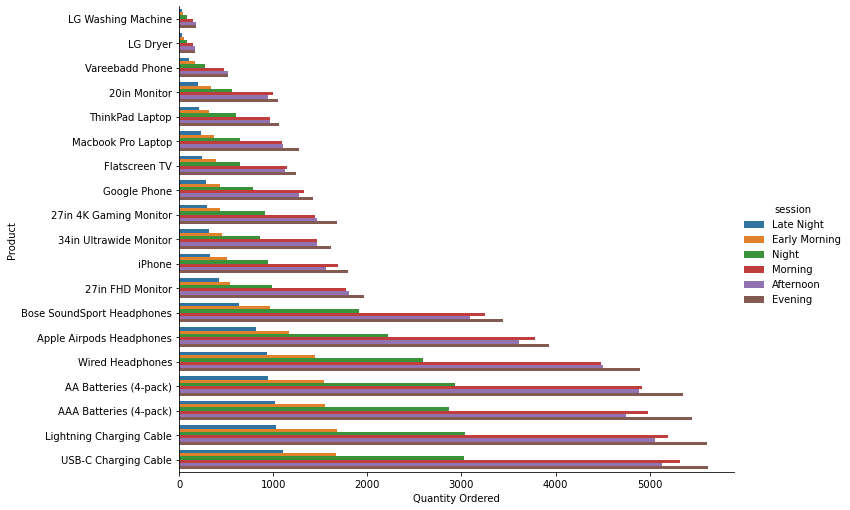

In [165]:
##visualising above data 
sns.catplot(y="Product",x='Quantity Ordered',hue='session',kind="bar",data=df_t, height=7, aspect=1.5)

# Q-5(b):- Which time of day has most sales

From above graph, it can be concluded that highest sales is seen in EVENING hours,ie, BROWN coloured bar. 
So, as per customer view, evening hours are preferred to be best working hours as people prefer to go out shoppping mostly in evening hours as compared to the other timings.
Whereas, as per staff view, late-night hours are preferred to be best working hours as people do not prefer to go out shoppping mostly in late-night hours as compared to the other timings.